In [9]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [10]:
#Load the Dataset
url="players.xlsx"
df= pd.read_excel(url)
print("First rows of the dataset: ")
print(df.head(150))

First rows of the dataset: 
        Player_Name        DOB Batting_Hand           Bowling_Skill  \
0    A Ashish Reddy 1991-02-24   Right_Hand        Right-arm medium   
1        A Chandila 1983-12-05   Right_Hand      Right-arm offbreak   
2          A Chopra 1977-09-19   Right_Hand      Right-arm offbreak   
3       A Choudhary        NaT   Right_hand    Left-arm fast-medium   
4       A Dananjaya        NaT   Right_Hand      Right-arm offbreak   
..              ...        ...          ...                     ...   
145        DR Smith 1983-04-12   Right_Hand        Right-arm medium   
146     DS Kulkarni 1988-12-10   Right_Hand        Right-arm medium   
147      DS Lehmann 1970-02-05    Left_Hand  Slow left-arm orthodox   
148    DT Christian 1983-05-04   Right_Hand   Right-arm fast-medium   
149        DT Patil 1984-12-06   Right_Hand                     NaN   

         Country  
0          India  
1          India  
2          India  
3            NaN  
4            NaN  
..   

In [2]:
print("\n Data types of each column: ")
print(df.dtypes)


 Data types of each column: 
Player_Name              object
DOB              datetime64[ns]
Batting_Hand             object
Bowling_Skill            object
Country                  object
dtype: object


In [3]:
print("Checking for missing values")
print(df.isnull().sum())

Checking for missing values
Player_Name       0
DOB              95
Batting_Hand      3
Bowling_Skill    64
Country          95
dtype: int64


In [5]:
#Removed null values
df.dropna()

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,A Ashish Reddy,1991-02-24,Right_Hand,Right-arm medium,India
1,A Chandila,1983-12-05,Right_Hand,Right-arm offbreak,India
2,A Chopra,1977-09-19,Right_Hand,Right-arm offbreak,India
5,A Flintoff,1977-12-06,Right_Hand,Right-arm fast-medium,England
8,A Kumble,1970-10-17,Right_Hand,Legbreak googly,India
...,...,...,...,...,...
560,YK Pathan,1982-11-17,Right_Hand,Right-arm offbreak,India
561,Younis Khan,1977-11-29,Right_Hand,Right-arm medium,Pakistan
562,YS Chahal,1990-07-23,Right_Hand,Legbreak googly,India
563,Yuvraj Singh,1981-12-12,Left_Hand,Slow left-arm orthodox,India


In [6]:
#Remove any duplicate rows
print("Checking for duplicate rows: ")
print(df.duplicated().sum())
df=df.drop_duplicates()

Checking for duplicate rows: 
0


In [20]:
# Convert DOB to datetime
df["DOB"] = pd.to_datetime(df["DOB"], errors='coerce')
# Calculate Age
df["Age"] = df["DOB"].apply(lambda x: datetime.now().year - x.year if pd.notnull(x) else None)
# Drop DOB column (optional)
df.drop(columns=["DOB"], inplace=True)
# Display age stats
print(df["Age"].describe())

count    471.000000
mean      40.677282
std        5.667929
min       27.000000
25%       36.000000
50%       40.000000
75%       44.000000
max       56.000000
Name: Age, dtype: float64


In [17]:
# Standardize 'Batting_Hand' values (fix casing & extra spaces)
df["Batting_Hand"] = df["Batting_Hand"].str.strip().str.replace("Right_hand", "Right_Hand")
df["Batting_Hand"]

0      Right_Hand
1      Right_Hand
2      Right_Hand
3      Right_Hand
4      Right_Hand
          ...    
561    Right_Hand
562    Right_Hand
563     Left_Hand
564    Right_Hand
565    Right_Hand
Name: Batting_Hand, Length: 566, dtype: object

C:\Users\HP\AppData\Local\Temp\ipykernel_14076\1956716956.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Batting_Hand"], palette="coolwarm")


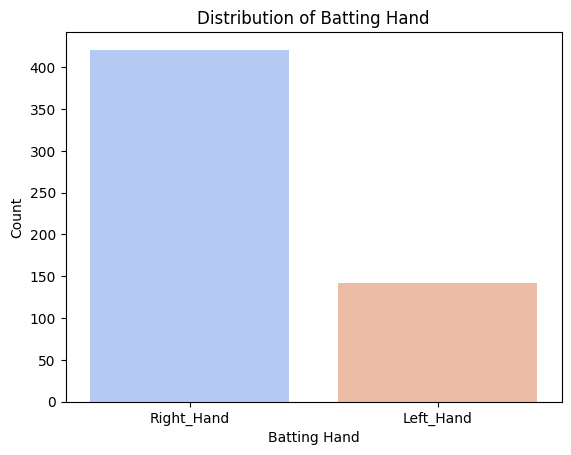

In [18]:
import seaborn as sns
sns.countplot(x=df["Batting_Hand"], palette="coolwarm")
plt.title("Distribution of Batting Hand")
plt.xlabel("Batting Hand")
plt.ylabel("Count")
plt.show()

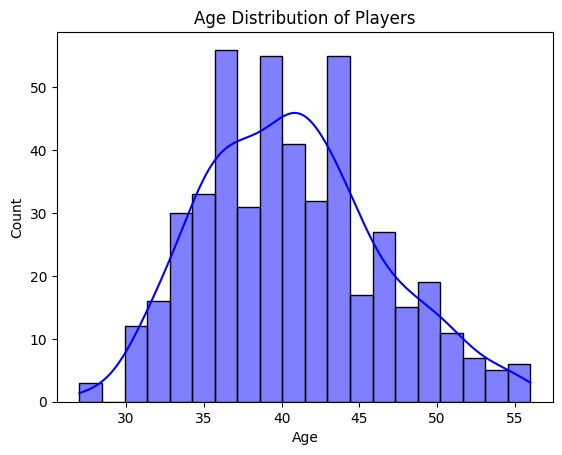

In [21]:
sns.histplot(df["Age"].dropna(), bins=20, kde=True, color="blue")
plt.title("Age Distribution of Players")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_14076\2589600148.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["Country"], order=df["Country"].value_counts().index, palette="viridis")


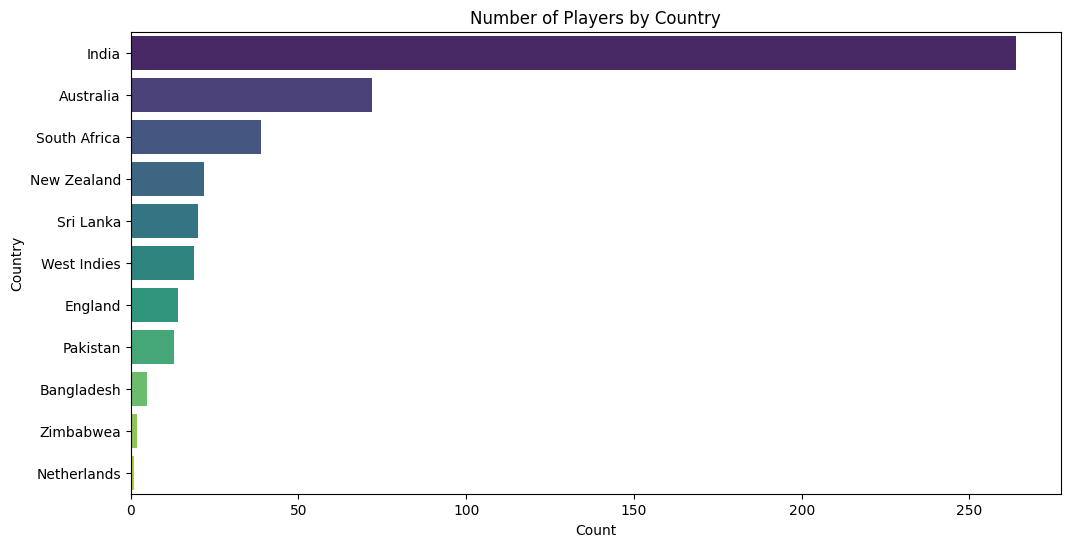

In [22]:
plt.figure(figsize=(12,6))
sns.countplot(y=df["Country"], order=df["Country"].value_counts().index, palette="viridis")
plt.title("Number of Players by Country")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_14076\3005850915.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["Bowling_Skill"], order=df["Bowling_Skill"].value_counts().index, palette="magma")


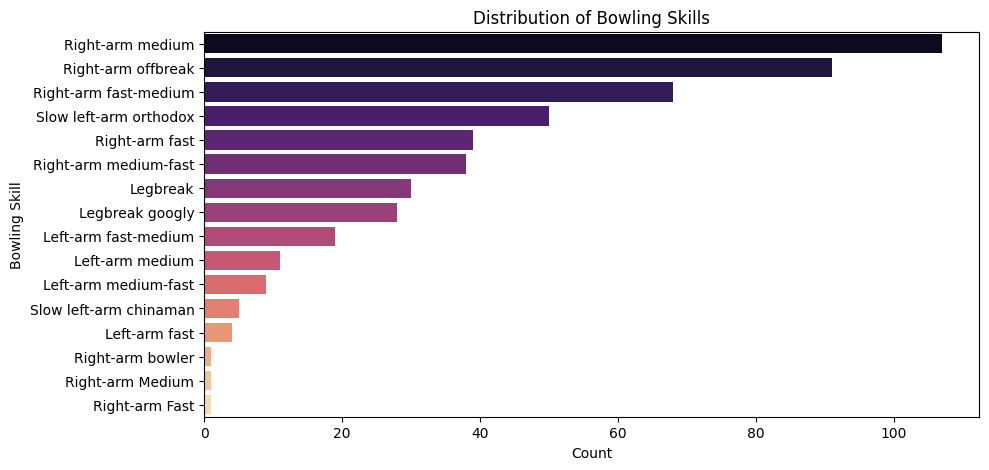

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(y=df["Bowling_Skill"], order=df["Bowling_Skill"].value_counts().index, palette="magma")
plt.title("Distribution of Bowling Skills")
plt.xlabel("Count")
plt.ylabel("Bowling Skill")
plt.show()